## Lab 2: Statistics

## Abstract

In this lab, we performed a coin flip experiment.  The purpose of this experiment was to show that the binomial probability distribution function can be approximated as the Poisson distribution in the limit of small p (chance of success, in this case flipping a head). We wrote a function to numerically calculate the binomial probability from a coin flip where the probability of the two discrete outcome are equal. To show the approximation, we adjusted this function so that p was sufficiently small. We ran this sumulation an effectively large number of times such that the probability of success (flipping heads) was very small.  What we found is that the binomial probability function from this closely resembled the Poisson probability distribution fuction.

## Introduction

In this experiment, we hope to show that the binomial probability distribution function can be approximated as the Poisson distribution in the limit of very small probability of a win.  To do this, we use frequentist statistical theory.  Frequentist statistical theory defines an event's probability as the limit of its relative frequency in a large number of trials.  We consider a binomial probability distribution function with very small probability of success and a very large number of trials.  This should yield the Poisson probability distribution function.

## Theory

#### Binomial Probability Distribution Derivation

The general form of the Binomial Distribuition is given as:  $P(N,x)=\frac{N!}{x!(N-x)!}p^x(1-p)^{N-x}$

The first term $\frac{N!}{x!(N-x)!}$ is called the binomial coefficient which implies there are "n choose k" different ways of distributing x succeses in a sequence of N trials.  There are N! different possible outcomes, and the denominator of the binomial coefficient accounts for these.  The denominator implies that there are x! successes, while there are (N-x)! failures.  The term $p^x$ implies that x successes will occur with probability $p^x$, and the last term $(1-p)^{N-x}$ implies n-x failures will occur with the probability $(1-p)^{N-x}$.

#### Poisson Distribution Derivation

From the binomial distribution shown above, we can derive the Poisson Probability Distribution in the limit of small p.<br>

First we take the natural log of both sides:  $ln(\frac{N!}{x!(N-x)!}p^x(1-p)^{N-x})$

This yields:  $ln(N!)-ln(x!)-ln((N-x)!)+x*ln(p)+(N-x)*(-p)$

We can apply Stirling's Approximation which states $ln(n!)=nln(n)-n$

The updated equation is:  $N*ln(N)-ln(x!)+x*ln(p)-(N-x)ln(N-x)-x-Np-xp$

>We can the approximate $ln(N-x)$ as $ln(N)+ln(1+\frac{x}{N})$<br>

>$ln(1+\frac{x}{N})$ can be further approximated to $\frac{x}{N}$, which can be approximated to 0.

This simplifies the equation to:  $N*ln(N)-ln(x!)+x*ln(p)-(N-x)ln(N)-x-Np+xp$

Multiply out the (N-x)ln(N) term and simplify:  $x*ln(p)-ln(x!)+x*ln(N)-x-Np-xp$

Combining natural logs to create lambda:  $x*ln(Np)-ln(x!)-Np-x+xp$<br>

x and xp can be approximated to 0, so we take the exponential of both sides, and we have the Poisson distribution:

$${\displaystyle\frac{\lambda^xe^{-\lambda}}{x!}}$$

#### Variance Derivation

$Variance(x) = <(x-<x>)^2 = <x^2>-<x>^2$

$= <x^2 - 2x<x> + <x>^2>$

$= <x^2> - <2x<x>> + <x>^2$

$= <x^2> - 2<x><x> + <x>^2$

$= <x^2> - 2<x>^2 + <x>^2$

$= <x^2> - <x>^2$

## Experiment and Methodology

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.misc import factorial

#1

Defining a function to simulate the coin flips

Counts: Each place in the array corresponds to the number of times heads was flipped that number of times

In [16]:
M = 100
N = 20
x = 8

def prob(N,x,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(2, size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    #print(counts)
    P = counts[x]/M
    #print (counts[x])
    #print (P)
    return counts

counts=prob(N,x,M)

Plotting Counts vs. x

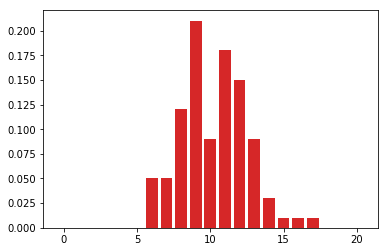

In [17]:
plt.bar(np.arange(N+1),counts/M)
plt.show()

Plotting Counts and Overplotting the Binomial Analytical Prediction

[  9.53674316e-07   1.90734863e-05   1.81198120e-04   1.08718872e-03
   4.62055206e-03   1.47857666e-02   3.69644165e-02   7.39288330e-02
   1.20134354e-01   1.60179138e-01   1.76197052e-01   1.60179138e-01
   1.20134354e-01   7.39288330e-02   3.69644165e-02   1.47857666e-02
   4.62055206e-03   1.08718872e-03   1.81198120e-04   1.90734863e-05
   9.53674316e-07]


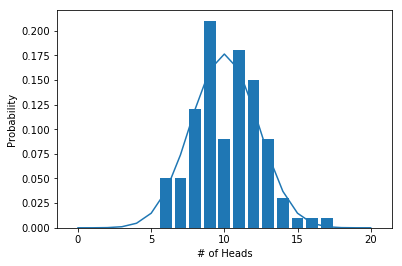

In [18]:
plt.bar(np.arange(N+1),counts/M)

def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**N)
    return PNx
print(PNx(20))

plt.plot(np.arange(21), PNx(20))
plt.ylabel("Probability")
plt.xlabel("# of Heads")
plt.show()

Adjusting the function from before to return P

In [19]:
M = 100
N = 20
x = 8

def prob(N,x,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(2, size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    #print(counts)
    P = counts[x]/M
    #print (counts[x])
    #print (P)
    return P

counts=prob(N,x,M)

Expected Value N = 20

In [20]:
Sig_total = 0
N = 20
for x in range(N+1):
    Sig_inside = x*prob(20,x,10000)
    Sig_total = Sig_total + Sig_inside
print (Sig_total)

10.0123


Expected Value N = 40

In [21]:
Sig_total = 0
N = 40
for x in range(N+1):
    Sig_inside = x*prob(40,x,10000)
    Sig_total = Sig_total + Sig_inside
print (Sig_total)

20.1631


#2

Changed Function from before for small p, runs experiment 10,000 times

In [23]:
p = 0.05
N = 100
M = 10000
def prob(N,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.uniform(0,1, size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1
    #print(counts)
    P = counts/M
    #print (P)
    return P

P = prob(N,M)
prob(100,10000)

array([ 0.0041,  0.0305,  0.08  ,  0.1408,  0.1811,  0.1802,  0.1516,
        0.1086,  0.0642,  0.0344,  0.0145,  0.0063,  0.002 ,  0.001 ,
        0.0004,  0.0003,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0. 

Plotting small p data with Binomial and Poisson analytical predictions

Red histogram is experimental data, black line is poisson analytical prediction, blue line is binomial analytical prediction

[  5.92052922e-003   3.11606801e-002   8.11817719e-002   1.39575678e-001
   1.78142642e-001   1.80017827e-001   1.50014856e-001   1.06025537e-001
   6.48708880e-002   3.49012965e-002   1.67158841e-002   7.19822760e-003
   2.80983446e-003   1.00107462e-003   3.27419144e-004   9.88001628e-005
   2.76250455e-005   7.18422237e-006   1.74353935e-006   3.96039408e-007
   8.44189265e-008   1.69261005e-008   3.19895202e-009   5.70979994e-010
   9.64154814e-011   1.54264770e-011   2.34207647e-012   3.37843390e-013
   4.63582095e-014   6.05769707e-015   7.54555249e-016   8.96754964e-017
   1.01769889e-017   1.10372447e-018   1.14472972e-019   1.13612273e-020
   1.07964879e-021   9.82895059e-023   8.57650813e-024   7.17602570e-025
   5.75970484e-026   4.43622966e-027   3.27991917e-028   2.32846159e-029
   1.58758745e-030   1.03982336e-031   6.54351083e-033   3.95688225e-034
   2.29950394e-035   1.28436310e-036   6.89500191e-038   3.55779252e-039
   1.76449224e-040   8.41068796e-042   3.85284926e-

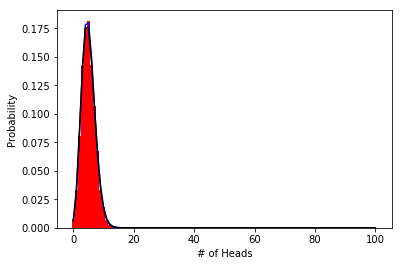

In [31]:
def PNx(N,p):
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx

def Poisson(N,p):
    x = (np.arange(N+1))
    Poisson = (((N*p)**x)*np.exp(-N*p))/factorial(x)
    return Poisson

print(PNx(100,0.05))

plt.bar(np.arange(101),P, color='r')
plt.plot(np.arange(101),PNx(100,0.05),color='b')
plt.plot(np.arange(101),Poisson(100,0.05),color='k')  #Poisson

plt.xlabel("# of Heads")
plt.ylabel("Probability")
plt.show()

Finding Variances

In [25]:
exp_x = 0
exp_x2 = 0
N = 100

for x in range(N+1):
    exp_xi = x*Poisson(100,0.05)[x]
    exp_x = exp_x + exp_xi

for x in range (N+1):
    exp_x2i = (x**2)*Poisson(100,0.05)[x]
    exp_x2 = exp_x2 + exp_x2i

print (exp_x)
print (exp_x2)

var = exp_x2 - exp_x**2
print (var)

5.0
30.0
5.0


In [26]:
exp_x_emp = 0
exp_x2_emp = 0

for x in range(N+1):
    exp_xi_emp = x*P[x]
    exp_x_emp = exp_x_emp + exp_xi_emp

for x in range(N+1):
    exp_xi2_emp = (x**2)*P[x]
    exp_x2_emp = exp_x2_emp + exp_xi2_emp
    
print (exp_x_emp)
print (exp_x2_emp)

var_emp = exp_x2_emp - exp_x_emp**2

print (var_emp)

4.9779
29.6015
4.82201159


In [36]:
print ('Emperical Variance =', var_emp)
print ('Experimental Variance =', var)

Emperical Variance = 4.82201159
Experimental Variance = 5.0


## Summary

To perform this experiment, we first defined a function with the inputs N, x, and M. N is the number of trials (coins being flipped), x is the number of successes (the number of time a head is flipped), and M is the number of times the experiment is run. The function returned the array "counts", in this array, the number of successes (heads flipped) corresponded to the number in the array. We then plotted the results of this, then overplotted the analytical prediction using the binomial probability distribution.  We found the analytical prediction to fit the data adequately.  To end the first part of this experiment, we found the expectation value of x for N=20 and N=40. The expecation values came within a few tenths of the analytical prediction.<br>

To start the second part of this experiment we derived the Poisson probability distribution from the Binomial distribution in the limit of small p.  That derivation can be seen in the theory section of this report.  To show that this derivation/approximation is valid, we adjusted our function from before to take p as an input along with N and M.  We set p to be 0.05 as that is sufficiently small to show the approximation.  We then plotted this counts array, and overplotted the Poisson and Binomial probability functions.  As seen in the plot, the Possion distribution is a good fit for this data.  To end the lab, we calculated the expectation values of x and $x^2$ for both the data and the analytical prediction.  From these expectaion values, we calculated the experimental variance, and the analytical variance.  The variances are similar to each other.

## Conclusions

The results of this experiment allow us to conclude that the binomial distribution can be approximated to the poisson distribution in the limit of very small p (probability of a win).  We ran our simulation of a coinflip with a 0.05% chance of success (flipping a head) 10,000 times, and plotted that as a histogram.  We then overplotted the poisson analytical prediction, and it is clear from that plot that the data fits the analytical prediction. This allows us to conclude that the binomial distribution can be approximated as the Poisson distribution for small p.